In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
902,2719-BDAQO,Male,0,No,No,17,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,93.85,1625.65,Yes
5842,2971-SGAFL,Female,0,No,No,13,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,78.75,995.35,No
4259,1087-UDSIH,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.60,59.75,Yes
2322,1306-RPWXZ,Female,0,No,Yes,49,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.45,1024.65,No
652,5845-BZZIB,Male,0,Yes,Yes,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,655.3,No


In [15]:
df = df.drop("customerID", axis = 1)

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [18]:
pd.to_numeric(df.TotalCharges)   #Converts to numeric value

ValueError: Unable to parse string " " at position 488

In [19]:
pd.to_numeric(df.TotalCharges, errors= "coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [20]:
df[pd.to_numeric(df.TotalCharges, errors = "coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
df.shape

(7043, 20)

In [22]:
df[df.TotalCharges != " "].shape

(7032, 20)

In [23]:
df1 = df[df.TotalCharges != " "]
df1.shape

(7032, 20)

In [24]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Python\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [27]:
df1[df1.Churn == "No"] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [28]:
df1[df1.Churn != "No"].tenure

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

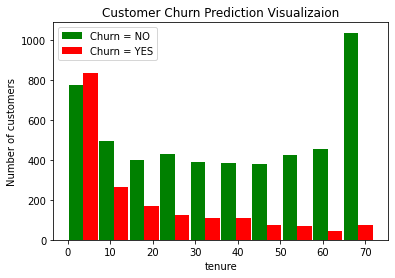

In [29]:
tenure_churn_no = df[df.Churn == "No"].tenure
tenure_churn_yes = df[df.Churn == "Yes"].tenure

plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualizaion")

plt.hist([tenure_churn_no, tenure_churn_yes], rwidth= 0.95, color=["green", "red"], label=["Churn = NO","Churn = YES"])
plt.legend()

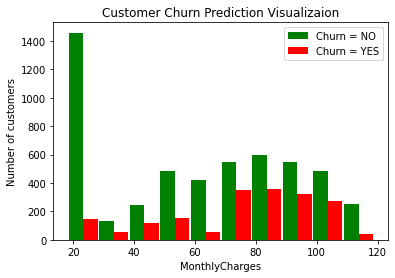

In [30]:
mc_churn_no = df[df.Churn == "No"].MonthlyCharges
mc_churn_yes = df[df.Churn == "Yes"].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualizaion")

plt.hist([mc_churn_no, mc_churn_yes], rwidth= 0.95, color=["green", "red"], label=["Churn = NO","Churn = YES"])
plt.legend()

In [31]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f'{column}:{df[column].unique()}')

In [32]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [33]:
df1.replace(["No internet service","No phone service"], "No", inplace = True)

C:\Python\lib\site-packages\pandas\core\frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [34]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [35]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({"Yes":1, "No":0},inplace = True)

C:\Python\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [36]:
print_unique_col_values(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [37]:
for col in df1:
    print(f"{col}: {df1[col].unique()} ")

gender: ['Female' 'Male'] 
SeniorCitizen: [0 1] 
Partner: [1 0] 
Dependents: [0 1] 
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
PhoneService: [0 1] 
MultipleLines: [0 1] 
InternetService: ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity: [0 1] 
OnlineBackup: [1 0] 
DeviceProtection: [0 1] 
TechSupport: [0 1] 
StreamingTV: [0 1] 
StreamingMovies: [0 1] 
Contract: ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling: [1 0] 
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 
Churn: [0 1] 


In [38]:
df1["gender"].replace({"Female":1, "Male":0}, inplace=True)

In [39]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
# df['species']= label_encoder.fit_transform(df['species']) ['InternetService','Contract','PaymentMethod']
df1['InternetService'] = le.fit_transform(df1['InternetService'])
df1["Contract"] = le.fit_transform(df1["Contract"])
df1["PaymentMethod"] = le.fit_transform(df1["PaymentMethod"])

C:\Users\nikhi\AppData\Local\Temp/ipykernel_8700/578325294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InternetService'] = le.fit_transform(df1['InternetService'])
C:\Users\nikhi\AppData\Local\Temp/ipykernel_8700/578325294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Contract"] = le.fit_transform(df1["Contract"])
C:\Users\nikhi\AppData\Local\Temp/ipykernel_8700/578325294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [42]:
for col in df1:
    print(f"{col}: {df1[col].unique()} ")

gender: [1 0] 
SeniorCitizen: [0 1] 
Partner: [1 0] 
Dependents: [0 1] 
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
PhoneService: [0 1] 
MultipleLines: [0 1] 
InternetService: [0 1 2] 
OnlineSecurity: [0 1] 
OnlineBackup: [1 0] 
DeviceProtection: [0 1] 
TechSupport: [0 1] 
StreamingTV: [0 1] 
StreamingMovies: [0 1] 
Contract: [0 1 2] 
PaperlessBilling: [1 0] 
PaymentMethod: [2 3 0 1] 
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 
Churn: [0 1] 


In [43]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int32
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [44]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

C:\Python\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [45]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [0 1 2]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtect

In [46]:
X = df1.drop("Churn", axis = 1)
y = df1["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [47]:
X_train.shape

(5625, 19)

In [48]:
X_test.shape

(1407, 19)

In [49]:
X_train.shape

(5625, 19)

In [50]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5664,1,1,0,0,0.126761,1,0,1,0,0,1,0,0,1,0,1,1,0.660199,0.097709
101,1,0,1,1,0.000000,1,0,2,0,0,0,0,0,0,0,0,2,0.011940,0.000075
2621,0,0,1,0,0.985915,1,0,0,0,1,1,1,1,1,2,1,1,0.605473,0.639978
392,1,1,0,0,0.014085,1,0,0,0,0,0,0,0,0,0,1,2,0.259204,0.008135
1327,0,0,1,0,0.816901,1,1,1,0,0,1,0,1,1,1,1,0,0.808458,0.685703


In [58]:
y_test.value_counts()  #Imbalance

0    999
1    408
Name: Churn, dtype: int64

In [59]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [60]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
    keras.layers.Dense(19, input_shape = (19,), activation = "relu"),
    keras.layers.Dense(10, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
    ])
    
    model.compile(optimizer = "adam",
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"]
                 )
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, epochs = 100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [56]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
176/176 [==============================] - 0s 977us/step - loss: 0.5063 - accuracy: 0.7486
Epoch 2/100
176/176 [==============================] - 0s 983us/step - loss: 0.4380 - accuracy: 0.7842
Epoch 3/100
176/176 [==============================] - 0s 972us/step - loss: 0.4271 - accuracy: 0.7941
Epoch 4/100
176/176 [==============================] - 0s 995us/step - loss: 0.4219 - accuracy: 0.8000
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8011
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8023
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8025
Epoch 8/100
176/176 [==============================] - 0s 966us/step - loss: 0.4138 - accuracy: 0.8036
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.410

176/176 [==============================] - 0s 972us/step - loss: 0.3769 - accuracy: 0.8244
Epoch 81/100
176/176 [==============================] - 0s 995us/step - loss: 0.3775 - accuracy: 0.8256
Epoch 82/100
176/176 [==============================] - 0s 983us/step - loss: 0.3769 - accuracy: 0.8233
Epoch 83/100
176/176 [==============================] - 0s 949us/step - loss: 0.3764 - accuracy: 0.8252
Epoch 84/100
176/176 [==============================] - 0s 977us/step - loss: 0.3758 - accuracy: 0.8236
Epoch 85/100
176/176 [==============================] - 0s 966us/step - loss: 0.3758 - accuracy: 0.8263
Epoch 86/100
176/176 [==============================] - 0s 954us/step - loss: 0.3764 - accuracy: 0.8231
Epoch 87/100
176/176 [==============================] - 0s 954us/step - loss: 0.3761 - accuracy: 0.8242
Epoch 88/100
176/176 [==============================] - 0s 972us/step - loss: 0.3752 - accuracy: 0.8256
Epoch 89/100
176/176 [==============================] - 0s 972us/step - loss:

# Under Sampling

In [65]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [67]:
count_class_0, count_class_1, = df1.Churn.value_counts()
df_class_0 = df1[df1["Churn"] == 0]
df_class_1 = df1[df1["Churn"] == 1]

In [68]:
count_class_0

5163

In [69]:
count_class_1

1869

In [71]:
df_class_0.shape   #Undersample this

(5163, 20)

In [72]:
df_class_1.shape

(1869, 20)

In [73]:
df_class_0_under = df_class_0.sample(count_class_1)

In [75]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)
df_test_under.shape

(3738, 20)

In [77]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [78]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)  #this y is given above
#Stratify will make sure that you have balanced sample

In [80]:
y_train.value_counts() #equal no of argument due to stratify argument

0    1495
1    1495
Name: Churn, dtype: int64

In [81]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.6468
Epoch 2/100
94/94 [==============================] - 0s 989us/step - loss: 0.5607 - accuracy: 0.7495
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7528
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7552
Epoch 5/100
94/94 [==============================] - 0s 989us/step - loss: 0.4954 - accuracy: 0.7569
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7595
Epoch 7/100
94/94 [==============================] - 0s 979us/step - loss: 0.4870 - accuracy: 0.7629
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7635
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7689
Epo

94/94 [==============================] - 0s 989us/step - loss: 0.4373 - accuracy: 0.7910
Epoch 83/100
94/94 [==============================] - 0s 989us/step - loss: 0.4357 - accuracy: 0.7940
Epoch 84/100
94/94 [==============================] - 0s 979us/step - loss: 0.4356 - accuracy: 0.7893
Epoch 85/100
94/94 [==============================] - 0s 979us/step - loss: 0.4384 - accuracy: 0.7849
Epoch 86/100
94/94 [==============================] - 0s 960us/step - loss: 0.4356 - accuracy: 0.7876
Epoch 87/100
94/94 [==============================] - 0s 989us/step - loss: 0.4355 - accuracy: 0.7903
Epoch 88/100
94/94 [==============================] - 0s 974us/step - loss: 0.4345 - accuracy: 0.7926
Epoch 89/100
94/94 [==============================] - 0s 979us/step - loss: 0.4361 - accuracy: 0.7930
Epoch 90/100
94/94 [==============================] - 0s 968us/step - loss: 0.4330 - accuracy: 0.7940
Epoch 91/100
94/94 [==============================] - 0s 987us/step - loss: 0.4332 - accuracy: 

# OverSampling

In [82]:
count_class_0, count_class_1

(5163, 1869)

In [87]:
df_class_1.sample(2000, replace=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1852,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0.278109,0.003162,1
260,0,1,0,0,0.028169,0,0,0,0,0,1,0,0,1,0,1,2,0.227861,0.013086,1
5584,0,0,1,0,0.140845,1,1,1,0,1,0,0,0,0,0,1,0,0.619403,0.101327,1
4402,0,0,0,0,0.535211,0,0,0,1,1,0,1,1,0,0,1,1,0.305473,0.214868,1
1734,0,0,0,0,0.112676,0,0,0,0,0,0,0,1,1,0,1,2,0.270149,0.046157,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,1,1,0,0,0.056338,1,1,1,0,0,0,0,1,0,0,1,1,0.645771,0.049302,1
834,1,1,0,0,0.042254,1,0,1,0,0,0,0,1,0,0,1,2,0.602985,0.031618,1
2577,1,0,0,0,0.000000,1,1,1,0,0,0,0,1,1,0,1,2,0.759701,0.008747,1
4,1,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [92]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [93]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [94]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [95]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 938us/step - loss: 0.5798 - accuracy: 0.7024
Epoch 2/100
259/259 [==============================] - 0s 923us/step - loss: 0.5145 - accuracy: 0.7458
Epoch 3/100
259/259 [==============================] - 0s 938us/step - loss: 0.5037 - accuracy: 0.7517
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7582
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4934 - accuracy: 0.7584
Epoch 6/100
259/259 [==============================] - 0s 938us/step - loss: 0.4898 - accuracy: 0.7607
Epoch 7/100
259/259 [==============================] - 0s 1000us/step - loss: 0.4872 - accuracy: 0.7622
Epoch 8/100
259/259 [==============================] - 0s 977us/step - loss: 0.4840 - accuracy: 0.7660
Epoch 9/100
259/259 [==============================] - 0s 930us/step - loss: 0.4828 - accuracy: 0.7644
Epoch 10/100
259/259 [==============================] - 0s 981us/step - loss

Epoch 80/100
259/259 [==============================] - 0s 923us/step - loss: 0.4317 - accuracy: 0.7983
Epoch 81/100
259/259 [==============================] - 0s 923us/step - loss: 0.4298 - accuracy: 0.7973
Epoch 82/100
259/259 [==============================] - 0s 925us/step - loss: 0.4307 - accuracy: 0.7971
Epoch 83/100
259/259 [==============================] - 0s 926us/step - loss: 0.4297 - accuracy: 0.8013
Epoch 84/100
259/259 [==============================] - 0s 915us/step - loss: 0.4299 - accuracy: 0.7979
Epoch 85/100
259/259 [==============================] - 0s 927us/step - loss: 0.4290 - accuracy: 0.8000
Epoch 86/100
259/259 [==============================] - 0s 942us/step - loss: 0.4282 - accuracy: 0.7983
Epoch 87/100
259/259 [==============================] - 0s 927us/step - loss: 0.4274 - accuracy: 0.7975
Epoch 88/100
259/259 [==============================] - 0s 932us/step - loss: 0.4277 - accuracy: 0.7989
Epoch 89/100
259/259 [==============================] - 0s 924us

# Smote

In [97]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [100]:
pip install imbalanced-Learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


In [114]:
from sklearn.metrics import DistanceMetric

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (C:\Python\lib\site-packages\sklearn\metrics\__init__.py)

In [109]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (C:\Python\lib\site-packages\sklearn\metrics\__init__.py)